<a href="https://colab.research.google.com/github/LatifulJoy/covid19-cnn-TL-mobilenet/blob/main/covid_19(23_7_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D,SeparableConv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D,SeparableConv2D, Flatten, Dropout, BatchNormalization

# Uploading The Dataset

In [2]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"latifuljoy","key":"5c49d122e1611b73411415358fb0fe9a"}'}

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [4]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 561M/572M [00:14<00:00, 47.2MB/s]
100% 572M/572M [00:14<00:00, 41.8MB/s]


In [5]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [6]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.


In [7]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [8]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

# Viewing The images

['person639_virus_1220.jpeg']
image shape (552, 1064)


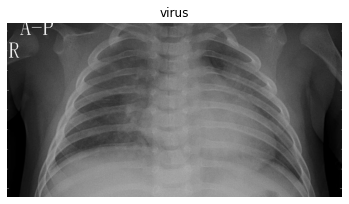

In [9]:
img = view_image("/content/COVID_IEEE/","virus")

['IM-0505-0001-0002.jpeg']
image shape (1171, 1314)


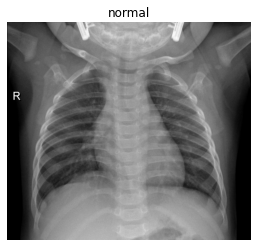

In [10]:
img = view_image("/content/COVID_IEEE/","normal")

['case48_Xray_4.jpeg']
image shape (884, 1068, 3)


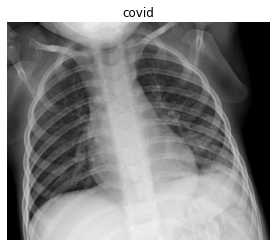

In [15]:
img = view_image("/content/COVID_IEEE/","covid")

# Reshaping the Dataset

In [16]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [17]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [18]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

# Normalize the Dataset

In [19]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [20]:
data

array([[[[0.29803922, 0.29803922, 0.29803922],
         [0.83529412, 0.83529412, 0.83529412],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.98039216, 0.98039216, 0.98039216],
         [0.13333333, 0.13333333, 0.13333333],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.03921569, 0.03921569, 0.03921569],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],

        [[0.54509804, 0.54509804, 0.54509804],
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.11764706, 0.11764706, 0.11764706],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08627451, 0.08627451, 0.08627451],
         [0.09019608, 0.09019608, 0.09019608]],

        ...,

        [[0.39607843, 0.39607843, 0.39607843],
         [0.41176471, 0.41176471, 0.41176471]

# Train Test Splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state= 42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [22]:
print("The size of the test dataset is: ", X_test.shape)
print("The size of the remaining dataset is : ", X_train.shape)

The size of the test dataset is:  (365, 224, 224, 3)
The size of the remaining dataset is :  (1458, 224, 224, 3)


In [23]:
#Split again into train and test to create small training and testing dataset
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)
print("The size of training dataset is: ", X_train.shape)
print("The size of test dataset is: ", X_test.shape)
print("The size of validation dataset is: ", X_valid.shape)

The size of training dataset is:  (1458, 224, 224, 3)
The size of test dataset is:  (365, 224, 224, 3)
The size of validation dataset is:  (365, 224, 224, 3)


# Developed CNN

In [67]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [68]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

Dropout(0.25)

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))
Dropout(0.25)

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))
Dropout(0.25)

#Block Number 4
model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=256,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))
Dropout(0.25)

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
Dropout(0.25)

model.add(Dense(units=128, activation="relu"))
Dropout(0.25)

model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer= opt ,loss='kullback_leibler_divergence',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 activation_17 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      18496     
                                                      

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=2, activation="softmax"))

model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs=30, batch_size=32)

Epoch 1/30
35/35 [==============================] - 6s 136ms/step - loss: 1.0618 - accuracy: 0.3806 - val_loss: 0.9828 - val_accuracy: 0.3589
Epoch 2/30
35/35 [==============================] - 4s 119ms/step - loss: 0.6798 - accuracy: 0.7210 - val_loss: 0.5455 - val_accuracy: 0.8219
Epoch 3/30
35/35 [==============================] - 4s 119ms/step - loss: 0.4423 - accuracy: 0.8225 - val_loss: 0.4762 - val_accuracy: 0.8110
Epoch 4/30
35/35 [==============================] - 4s 119ms/step - loss: 0.3523 - accuracy: 0.8820 - val_loss: 0.3400 - val_accuracy: 0.8822
Epoch 5/30
35/35 [==============================] - 4s 119ms/step - loss: 0.3265 - accuracy: 0.8820 - val_loss: 0.3056 - val_accuracy: 0.8849
Epoch 6/30
35/35 [==============================] - 4s 120ms/step - loss: 0.2379 - accuracy: 0.9250 - val_loss: 0.3212 - val_accuracy: 0.8822
Epoch 7/30
35/35 [==============================] - 4s 120ms/step - loss: 0.2251 - accuracy: 0.9332 - val_loss: 0.2516 - val_accuracy: 0.9041
Epoch 

# Viewing the Loss and accuracy Curve

Text(0.5, 1.0, 'Accuracy Curves')

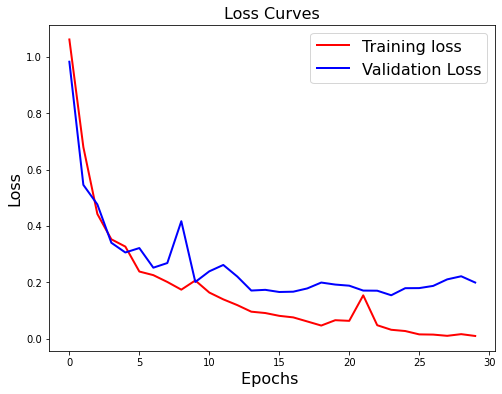

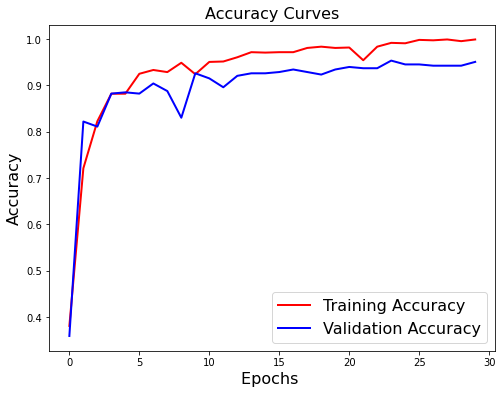

In [71]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [72]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1,
       2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0,

# Classification Report

In [73]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94       129
           2       0.94      0.91      0.93       128

    accuracy                           0.94       365
   macro avg       0.95      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



# Test Accuracy

In [74]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

12/12 [==============================] - 1s 45ms/step - loss: 0.1997 - accuracy: 0.9425
['loss', 'accuracy']
[0.1996852159500122, 0.9424657821655273]


In [75]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.1996852159500122
accuracy:  0.9424657821655273


# Confusion Matrix

In [76]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,102,3,3
normal,0,125,4
virus,2,9,117


# MobileNet

In [35]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17235968/17225924 [==============================] - 0s 0us/step


In [36]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=128, activation="relu")(model)
Dropout(0.25)


prediction_layer = Dense(units=3, activation="softmax")(model)

In [37]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [38]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer= opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [40]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), epochs=15, batch_size=32)

Epoch 1/15
46/46 [==============================] - 6s 89ms/step - loss: 5.5784 - accuracy: 0.7798 - val_loss: 0.2902 - val_accuracy: 0.9671
Epoch 2/15
46/46 [==============================] - 3s 58ms/step - loss: 0.3212 - accuracy: 0.9630 - val_loss: 0.0334 - val_accuracy: 0.9945
Epoch 3/15
46/46 [==============================] - 3s 57ms/step - loss: 0.2346 - accuracy: 0.9705 - val_loss: 0.0079 - val_accuracy: 0.9945
Epoch 4/15
46/46 [==============================] - 3s 62ms/step - loss: 0.0593 - accuracy: 0.9883 - val_loss: 0.1076 - val_accuracy: 0.9753
Epoch 5/15
46/46 [==============================] - 3s 62ms/step - loss: 0.1354 - accuracy: 0.9787 - val_loss: 0.2943 - val_accuracy: 0.9726
Epoch 6/15
46/46 [==============================] - 3s 59ms/step - loss: 0.1656 - accuracy: 0.9822 - val_loss: 0.0497 - val_accuracy: 0.9890
Epoch 7/15
46/46 [==============================] - 3s 58ms/step - loss: 0.0405 - accuracy: 0.9925 - val_loss: 0.0052 - val_accuracy: 0.9973
Epoch 8/15
46

Text(0.5, 1.0, 'Accuracy Curves')

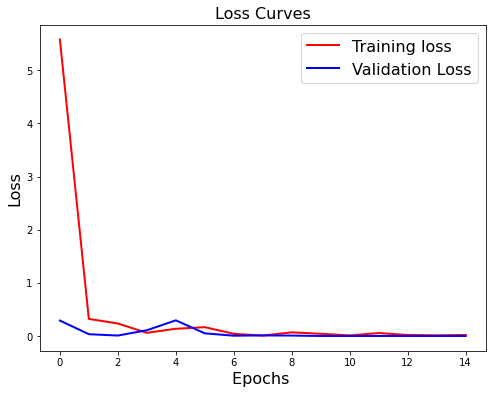

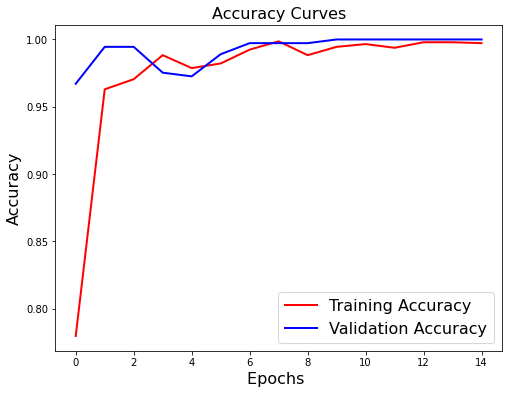

In [41]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [42]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [43]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       0.95      0.95      0.95       129
           2       0.95      0.95      0.95       128

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



In [44]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

12/12 [==============================] - 1s 44ms/step - loss: 0.3539 - accuracy: 0.9616
['loss', 'accuracy']
[0.35391685366630554, 0.9616438150405884]


In [45]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.35391685366630554
accuracy:  0.9616438150405884


In [46]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,108,0,0
normal,1,122,6
virus,1,6,121


# DenseNet121

In [47]:
densenet = tf.keras.applications.DenseNet121(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in densenet.layers:
  layer.trainable =False

29097984/29084464 [==============================] - 0s 0us/step


In [48]:
model = Flatten()(densenet.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=128, activation="relu")(model)
Dropout = 0.25

prediction_layer = Dense(units=3, activation="softmax")(model)

In [49]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=.0001)

In [50]:
model = Model(inputs = densenet.input, outputs = prediction_layer)
model.compile(optimizer=opt ,loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [52]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=15, batch_size=32)

Epoch 1/15
46/46 [==============================] - 17s 224ms/step - loss: 0.4495 - accuracy: 0.8608 - val_loss: 0.0633 - val_accuracy: 0.9781
Epoch 2/15
46/46 [==============================] - 6s 131ms/step - loss: 0.0706 - accuracy: 0.9733 - val_loss: 0.0171 - val_accuracy: 0.9945
Epoch 3/15
46/46 [==============================] - 6s 125ms/step - loss: 0.0557 - accuracy: 0.9822 - val_loss: 0.0742 - val_accuracy: 0.9699
Epoch 4/15
46/46 [==============================] - 6s 126ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0096 - val_accuracy: 0.9973
Epoch 5/15
46/46 [==============================] - 6s 131ms/step - loss: 0.0215 - accuracy: 0.9925 - val_loss: 0.0390 - val_accuracy: 0.9918
Epoch 6/15
46/46 [==============================] - 6s 126ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 7/15
46/46 [==============================] - 6s 126ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.0329 - val_accuracy: 0.9863
Epoch

Text(0.5, 1.0, 'Accuracy Curves')

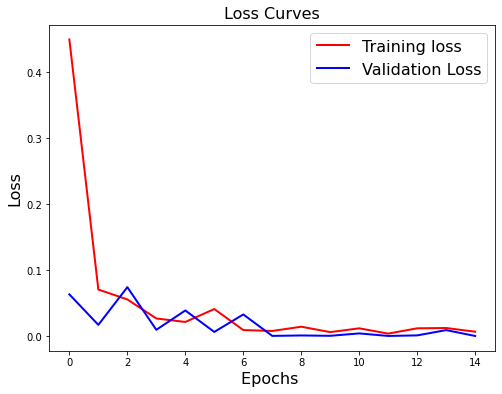

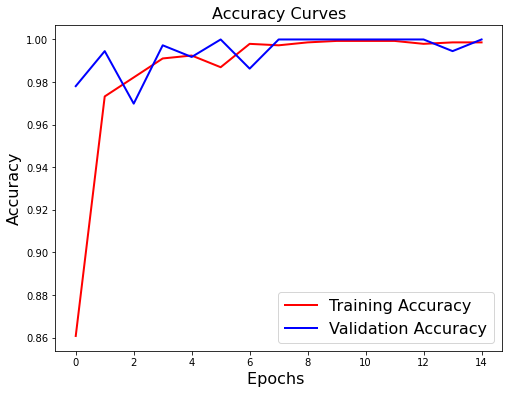

In [53]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=16)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [54]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [55]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.91      0.99      0.95       129
           2       0.99      0.91      0.95       128

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



In [56]:
results = model.evaluate(X_test, y_test)
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

12/12 [==============================] - 1s 93ms/step - loss: 0.1919 - accuracy: 0.9589
['loss', 'accuracy']
[0.19187532365322113, 0.9589040875434875]


In [57]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  0.19187532365322113
accuracy:  0.9589040875434875


In [58]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,3,0
normal,0,128,1
virus,1,10,117
